# Decision tree
To predict the revenue of an ice-cream shop using decision tree regression, based on temperature for 500 days. 


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
Icecream_data = pd.read_csv("IceCreamData.csv")
Icecream_data.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [3]:
Icecream_data.info

<bound method DataFrame.info of      Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]>

In [4]:
Icecream_data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [5]:
Icecream_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
x = Icecream_data['Temperature'].values
y = Icecream_data['Revenue'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=5)
DTR.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(max_depth=5)

In [19]:
print(DTR.score(x_train.reshape(-1,1), y_train.reshape(-1,1)))
print(DTR.score(x_test.reshape(-1,1),y_test.reshape(-1,1)))

0.9838219367911729
0.973838449506385


In [20]:
y_pred = DTR.predict(x_test.reshape(-1,1))

In [22]:
new_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
new_df.head(20)

,Real Values,Predicted Values
0,473.568112,436.075657
1,195.735722,184.982545
2,607.542148,569.275816
3,468.975103,466.196885
4,507.356810,466.196885
5,627.650834,634.235412
6,541.293663,466.196885
7,223.435016,208.106167
8,412.082357,411.760363
9,739.387272,752.052374


You can see that the predicted values are quite close to the actual values and so we can carry on with the visualisation of results.

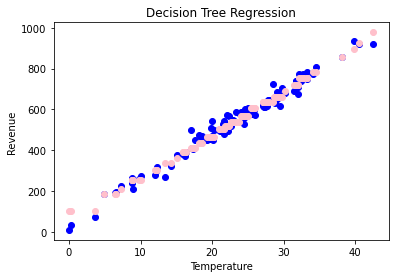

In [23]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, y_pred, color = 'pink')
plt.title('Decision Tree Regression for ice cream sales')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

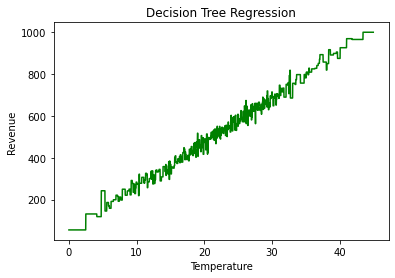

In [24]:
plt.plot(x_grid, regressor.predict(x_grid), color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()